Market segmentation
Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_sm=pd.read_csv('social_marketing.csv')

In [3]:
pd.set_option('display.max_columns', None)
df_sm.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,1,2,0,0,0,1,17,0,2,5,1,1,0,2,1,0,0,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,2,1,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,1,1,1,1,0,2,0,0,0,2,1,0,0,0,2,0,8,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,3,0,2,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,1,0,0,0,3,2,0,4,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
df_sm.columns

Index(['Unnamed: 0', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [5]:
df_sm.sum()

Unnamed: 0          hmjoe4g3kclk1m5w8sjcsovtak33oeb4hilnfd75x1vgkh...
chatter                                                         34671
current_events                                                  12030
travel                                                          12493
photo_sharing                                                   21256
uncategorized                                                    6408
tv_film                                                          8436
sports_fandom                                                   12564
politics                                                        14098
food                                                            11015
family                                                           6809
home_and_garden                                                  4104
music                                                            5354
news                                                             9502
online_gaming       

In [6]:
df_sm.describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.398757,1.526262,1.585004,2.696777,0.812992,1.070287,1.594012,1.788632,1.397488,0.863867,0.520680,0.679269,1.205532,1.208830,1.389368,2.567242,1.549480,0.639178,1.998224,0.512307,0.649074,0.423243,0.782669,0.515859,0.829866,0.724816,1.095407,0.705151,0.921340,0.710860,0.767699,1.462065,0.996574,0.336336,0.006470,0.403324
std,3.529126,1.268890,2.285530,2.731510,0.935853,1.658783,2.160917,3.031113,1.775557,1.132562,0.736691,1.030015,2.100780,2.687465,1.808846,4.496144,2.897154,0.975517,3.429941,0.769725,1.179453,0.692379,1.209483,0.816848,1.366151,1.629576,1.914829,1.327903,1.515359,1.782347,1.188259,2.405244,1.828412,0.618147,0.083288,1.813428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,26.000000,8.000000,26.000000,21.000000,9.000000,17.000000,20.000000,37.000000,16.000000,10.000000,5.000000,13.000000,20.000000,27.000000,12.000000,41.000000,30.000000,8.000000,33.000000,6.000000,16.000000,6.000000,12.000000,7.000000,13.000000,18.000000,20.000000,14.000000,14.000000,24.000000,11.000000,19.000000,18.000000,6.000000,2.000000,26.000000


In [7]:
df_sm.drop('Unnamed: 0', axis=1, inplace=True)
df_sm.drop('chatter', axis=1, inplace=True)
df_sm = df_sm[df_sm['adult']<15]
df_sm.drop(columns= ['spam', 'uncategorized', 'adult'], axis=1, inplace=True)

In [8]:
df_sm.columns

Index(['current_events', 'travel', 'photo_sharing', 'tv_film', 'sports_fandom',
       'politics', 'food', 'family', 'home_and_garden', 'music', 'news',
       'online_gaming', 'shopping', 'health_nutrition', 'college_uni',
       'sports_playing', 'cooking', 'eco', 'computers', 'business', 'outdoors',
       'crafts', 'automotive', 'art', 'religion', 'beauty', 'parenting',
       'dating', 'school', 'personal_fitness', 'fashion', 'small_business'],
      dtype='object')

In [9]:
df_sm.corr()

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business
current_events,1.000000,0.050809,0.146461,0.077922,0.061024,0.068056,0.060212,0.063010,0.053527,0.073919,0.059619,-0.001146,0.149651,0.019315,0.031590,0.030642,0.047377,0.075815,0.055513,0.074727,0.015157,0.073252,0.071341,0.053545,0.067651,0.070006,0.049052,0.030311,0.067750,0.037901,0.056626,0.065537
travel,0.050809,1.000000,0.023963,0.097291,-0.008737,0.660764,0.075522,0.017468,0.041479,0.039123,0.251050,0.013069,0.020150,-0.011700,0.053963,0.055253,0.017925,0.060912,0.603377,0.162073,0.027089,0.087222,-0.003222,0.086546,0.064165,0.012269,0.042605,0.087599,0.022271,-0.005059,0.026198,0.115207
photo_sharing,0.146461,0.023963,1.000000,0.021276,0.020230,0.039467,0.007471,0.098921,0.084300,0.146402,-0.012008,0.037304,0.536183,0.033936,0.061561,0.098572,0.359876,0.173708,0.092788,0.178426,0.032037,0.111151,0.115267,0.024696,0.003890,0.317829,0.041741,0.027499,0.106349,0.061661,0.346920,0.137995
tv_film,0.077922,0.097291,0.021276,1.000000,0.030697,0.031884,0.080828,0.021822,0.107348,0.274845,0.067134,0.035398,0.041129,-0.002031,0.204289,0.102830,0.000580,0.063562,-0.005114,0.100983,0.029378,0.184748,0.020707,0.499055,0.045052,0.017051,-0.001628,0.004600,0.025228,-0.000657,0.017686,0.189672
sports_fandom,0.061024,-0.008737,0.020230,0.030697,1.000000,0.067907,0.534220,0.437968,0.084740,0.055052,0.201089,0.025393,0.025740,-0.010987,0.027378,0.070157,0.008198,0.085267,0.050753,0.067320,0.061830,0.199583,0.239148,0.022585,0.636189,0.121755,0.606685,0.016465,0.492143,0.013444,0.030660,0.050010
politics,0.068056,0.660764,0.039467,0.031884,0.067907,1.000000,0.059299,0.046013,0.058759,0.007293,0.561968,-0.007053,0.045990,-0.017141,0.008823,0.032365,-0.007539,0.064500,0.573949,0.150781,0.073844,0.058789,0.285921,0.025435,0.033672,-0.011364,0.045380,0.078846,0.028991,-0.008316,-0.006778,0.105441
food,0.060212,0.075522,0.007471,0.080828,0.534220,0.059299,1.000000,0.375895,0.088727,0.072119,0.064311,0.045264,0.021268,0.223496,0.047865,0.089019,0.068128,0.148507,0.113152,0.076818,0.191217,0.238768,0.059366,0.101996,0.593268,0.102954,0.546532,0.033619,0.433808,0.224030,0.037487,0.064511
family,0.063010,0.017468,0.098921,0.021822,0.437968,0.046013,0.375895,1.000000,0.065790,0.035393,0.094557,0.082865,0.084261,0.026729,0.068813,0.099150,0.055643,0.085847,0.062151,0.063065,0.057271,0.170909,0.149699,0.030286,0.452687,0.117964,0.420577,0.017543,0.333821,0.038050,0.062691,0.062987
home_and_garden,0.053527,0.041479,0.084300,0.107348,0.084740,0.058759,0.088727,0.065790,1.000000,0.063698,0.081210,0.030680,0.073177,0.063595,0.061375,0.068144,0.073012,0.072151,0.052385,0.047381,0.072990,0.075646,0.071080,0.105733,0.094321,0.073349,0.079406,0.105142,0.098299,0.074125,0.076393,0.079899
music,0.073919,0.039123,0.146402,0.274845,0.055052,0.007293,0.072119,0.035393,0.063698,1.000000,0.015689,0.023663,0.106144,0.051620,0.188280,0.108490,0.169995,0.071337,0.042982,0.102793,0.088901,0.078747,0.030275,0.020118,0.076097,0.177830,0.044390,0.010604,0.052488,0.051646,0.160308,0.122993


In [10]:
normalized_data=df_sm.copy()

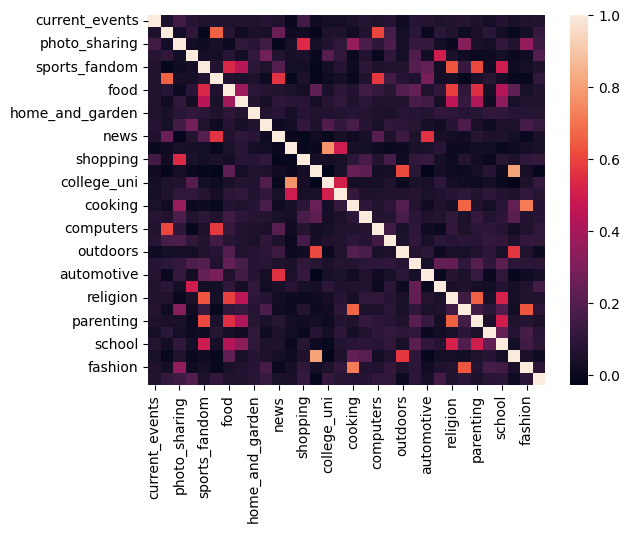

In [11]:
plt.figsize=(7,5)
heatmap= normalized_data.corr()
sns.heatmap(data=heatmap)
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

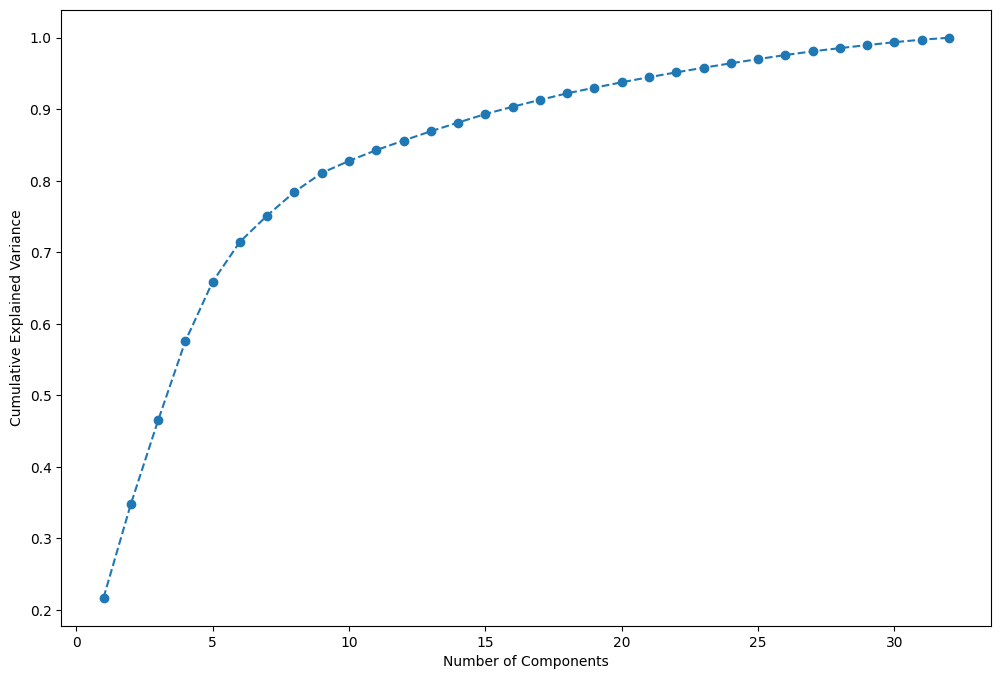

In [12]:
pca = PCA()
pca.fit(normalized_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [13]:
pca = PCA(n_components=8)
pca.fit(normalized_data)
df_pca_components = pd.DataFrame(data=pca.components_.round(4),columns=normalized_data.columns.values)


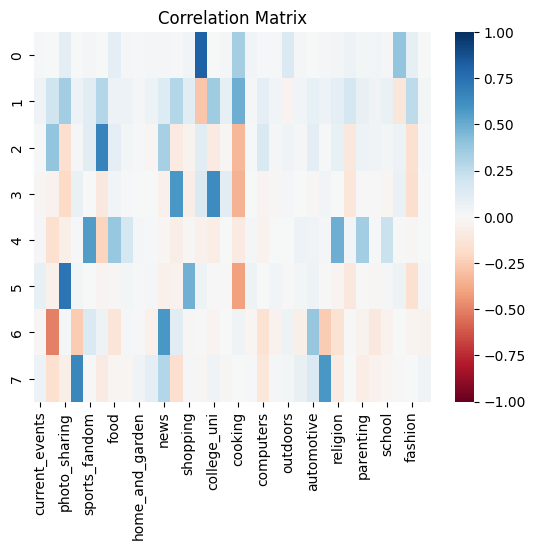

In [14]:
b = sns.heatmap(df_pca_components,vmin=-1,vmax=1,cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [15]:
pca_scores = pca.transform(normalized_data)
results = {}
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)
    results[i] = kmeans_pca.inertia_

/Users/saiyam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiyam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiyam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saiyam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

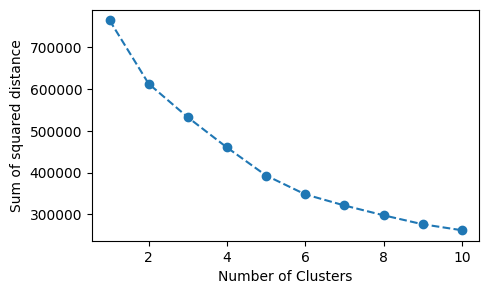

In [16]:
plt.figure(figsize=(5, 3))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [17]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)
df_segm_pca = pd.concat([normalized_data.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca['K-means PCA'] = kmeans_pca.labels_
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(2)
df_segm_pca_analysis['Count'] = df_segm_pca[['K-means PCA', 'travel']].groupby(['K-means PCA']).count()
df_segm_pca_analysis['%'] = df_segm_pca_analysis['Count'] / df_segm_pca_analysis['Count'].sum()
df_segm_pca_analysis

/Users/saiyam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,0,1,2,3,4,5,6,7,Count,%
K-means PCA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.50,1.58,2.36,1.05,1.60,1.86,1.23,0.82,0.49,0.60,1.22,0.60,1.33,0.89,0.96,0.48,0.83,0.44,0.63,0.40,0.48,0.47,0.83,0.65,1.07,0.44,0.88,0.64,0.74,0.65,0.58,0.32,-2.26,-0.70,0.42,-0.49,0.17,0.19,-0.03,0.05,5693,0.724208
1,1.57,1.49,2.59,1.05,1.54,1.57,2.23,0.92,0.62,0.74,1.26,0.92,1.41,11.68,1.05,0.65,3.19,0.85,0.65,0.46,2.33,0.64,0.73,0.79,1.11,0.53,1.00,1.05,0.76,5.82,0.81,0.29,9.86,-2.84,1.04,0.89,-0.10,0.24,-0.03,0.00,1132,0.144002
2,1.75,1.74,6.10,1.04,1.56,1.67,1.31,0.99,0.62,1.19,1.12,1.04,1.95,1.99,1.45,0.84,11.32,0.57,0.84,0.60,0.79,0.66,0.93,0.92,1.30,3.67,1.09,0.70,1.06,1.29,5.45,0.49,3.61,7.73,-4.77,-5.28,-0.75,-2.12,0.02,-0.03,591,0.075181
3,1.48,1.63,2.75,1.46,1.64,1.55,1.46,1.13,0.57,0.84,1.04,9.99,1.32,1.56,10.54,2.42,1.52,0.49,0.65,0.42,0.63,0.61,0.97,1.22,1.05,0.54,0.98,0.75,0.68,1.02,0.92,0.44,-1.00,5.98,-1.70,11.04,-0.96,-0.22,0.44,-0.60,445,0.056609


<Axes: xlabel='K-means PCA'>

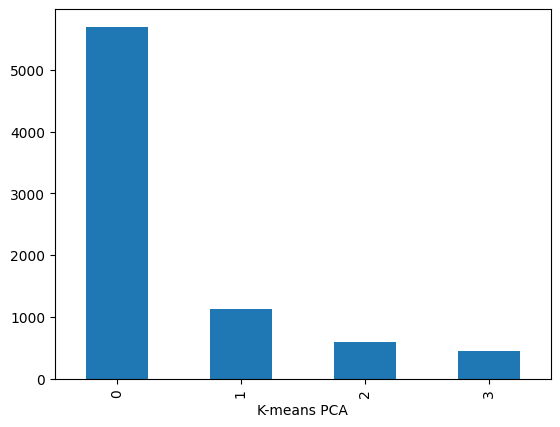

In [18]:
df_segm_pca_analysis['Count'].plot(kind='bar')

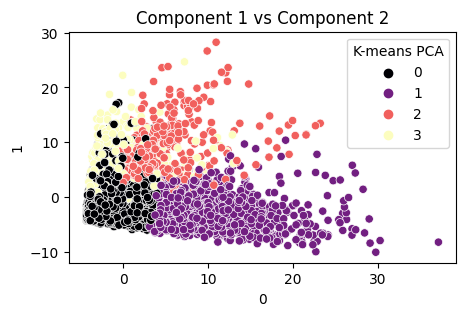

In [19]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df_segm_pca[0], y=df_segm_pca[1], hue=df_segm_pca['K-means PCA'], palette='magma')
plt.title('Component 1 vs Component 2')
plt.show()

In [20]:
df_segm_pca_analysis

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,0,1,2,3,4,5,6,7,Count,%
K-means PCA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.50,1.58,2.36,1.05,1.60,1.86,1.23,0.82,0.49,0.60,1.22,0.60,1.33,0.89,0.96,0.48,0.83,0.44,0.63,0.40,0.48,0.47,0.83,0.65,1.07,0.44,0.88,0.64,0.74,0.65,0.58,0.32,-2.26,-0.70,0.42,-0.49,0.17,0.19,-0.03,0.05,5693,0.724208
1,1.57,1.49,2.59,1.05,1.54,1.57,2.23,0.92,0.62,0.74,1.26,0.92,1.41,11.68,1.05,0.65,3.19,0.85,0.65,0.46,2.33,0.64,0.73,0.79,1.11,0.53,1.00,1.05,0.76,5.82,0.81,0.29,9.86,-2.84,1.04,0.89,-0.10,0.24,-0.03,0.00,1132,0.144002
2,1.75,1.74,6.10,1.04,1.56,1.67,1.31,0.99,0.62,1.19,1.12,1.04,1.95,1.99,1.45,0.84,11.32,0.57,0.84,0.60,0.79,0.66,0.93,0.92,1.30,3.67,1.09,0.70,1.06,1.29,5.45,0.49,3.61,7.73,-4.77,-5.28,-0.75,-2.12,0.02,-0.03,591,0.075181
3,1.48,1.63,2.75,1.46,1.64,1.55,1.46,1.13,0.57,0.84,1.04,9.99,1.32,1.56,10.54,2.42,1.52,0.49,0.65,0.42,0.63,0.61,0.97,1.22,1.05,0.54,0.98,0.75,0.68,1.02,0.92,0.44,-1.00,5.98,-1.70,11.04,-0.96,-0.22,0.44,-0.60,445,0.056609


/var/folders/r9/s7zsd2g16z1gx1whz5r99cpr0000gn/T/ipykernel_12827/2536869611.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_segment_summary = a[all_top_categories]


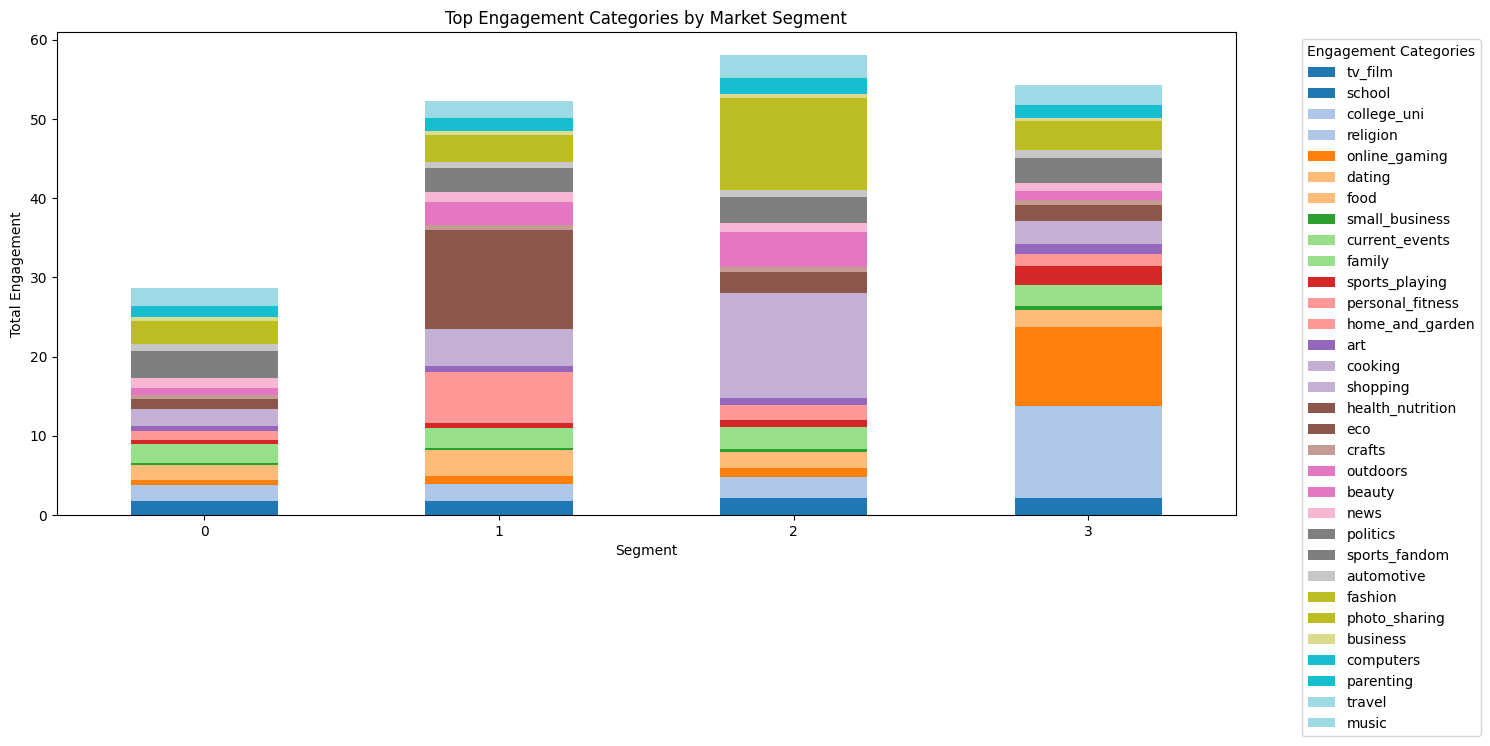

In [21]:
a=df_segm_pca_analysis.drop(columns=[0,1,2,3,4, 5,6,7,'%',"Count"],axis=1)
N = 35
top_categories = a.apply(lambda x:x.nlargest(N).index.tolist(),axis=1)
all_top_categories = set([item for sublist in top_categories for item in sublist])
filtered_segment_summary = a[all_top_categories]
ax = filtered_segment_summary.plot(kind='bar',stacked=True,figsize=(15,7),cmap='tab20')
plt.title(f'Top Engagement Categories by Market Segment')
plt.xlabel('Segment')
plt.ylabel('Total Engagement')
plt.xticks(rotation=0)
plt.legend(title='Engagement Categories',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
Profiles= ['Randon Profile','Nutrionists','Influencers', 'GenZ']
Size=[5693,1132,591,445]
Size_propotion=[72,24,7.5,5.6]
Engagement=['Sports fandom, Politics, Travel, Photo Sharing', 'Health Nutrition, Personal Fitness', \
           'Photo Sharing, Cooking, Fashion, Beauty', 'Online Gaming, College Uni']
Potential=['Tweets', 'Nutrition Tips and Tricks', 'Online Event and Sharing Activities', 'Quizzes']

In [23]:
df = pd.DataFrame(list(zip(Profiles, Size,Size_propotion,Engagement, Potential )),
               columns =['Profiles', 'Size','Size_propotion' ,'Engagement', 'Potential'])

In [24]:
df

,Profiles,Size,Size_propotion,Engagement,Potential
0,Randon Profile,5693,72.0,"Sports fandom, Politics, Travel, Photo Sharing",Tweets
1,Nutrionists,1132,24.0,"Health Nutrition, Personal Fitness",Nutrition Tips and Tricks
2,Influencers,591,7.5,"Photo Sharing, Cooking, Fashion, Beauty",Online Event and Sharing Activities
3,GenZ,445,5.6,"Online Gaming, College Uni",Quizzes


We have assumed that the client is a nutrition company, trying to market a healthy product to their followers. 
From our data. We have dropped all users who have posted more than 10 adult tweets. 
We have segmented the rest of the users in 3 parts.

Segment 1- No Data
This segment did not provide with any substantial amount of data. These account for 72%(5693) of the followers

Segment 1 - Nutrionists.
These are the users who are actively interested in nutrition and fitness. We can see that these are the group of people who mostly tweet about cooking, fitness and healthy nutrition. These account for 24%(1132) of the followers

Segment 2- The Influencers
These are the users who are actively interested in sharing a pompous life on social media. They are highly interested in cooking, beauty and fashion and tend to share those photos online. They could be a small group of people, but they have the ability to help with the maximum engagement. These account for 7.5%(591) of the followers. 


Segment 4 - GenZ
This segment contains mainly of college students and online gamers. Once again they account for a small amount of people, but have the potential to help a lot in mass engagement among the users. These account for 5.6% (445) of the followers.


The data is collected in the course of a market-research study using followers of the Twitter account of a large consumer brand "NutrientH20". The goal here is for NutrientH20 to understand its social-media audience a little bit better, so that it can hone its messaging a little more sharply.
The data contains 36 odd rows related to the interests of a user via a set of tweets that they made over a period of 7 days.

We used a combination of PCA and K-means Clustering to segment the data in various groups to understand the typical patterns of the followers of NutrientH20. We were able to segment the followers in 4 groups and named those groups as 'Randon Profiles','Nutrionists','Influencers' and 'GenZ'. We tried correlation analysis, but it didn't give us expected results because of low correlation between most of the columns. 
K-means was not able to perform well as a standalone model, mainly due to the high dimensionality of the data, hence we used PCA for dimensionality reduction.

Insights and Recommendations: 
##### Nutrionists 
- A marketing activity can be carried out to cater to the nutritionists of the group. Probably a discount activity to offer products who would share their existing nutrition regime, or a giveaway to the winners of a fitness contest. NutrientH20 should start publishing Nutrition tips and tricks, which the "Nutritionists" can use and share among their groups and communities.

##### Influencers
- This group contains of people who are interested in posting photos about cooking and fashion. On the similar lines of the previous contest, we could run a marketing campaign to let people make food and upload photos by tagging NutrientH20, and the winners could be given a discount on their next order. This contest will help in increasing outreach and also help gain an insight on NutrientH20's customer's eating habits. 

##### GenZ
- A quiz on online gaming or a fun activity for college students could help penetrate the reach in the student market. This activity can be engaging for students, they could invite their friends to participate as well.

By following these steps, NutrientH20 can gain a deeper understanding of its social-media audience and tailor its messaging to connect with different segments more effectively.